# Proyek Analisis Data: Bike Sharing Datasets
- Nama : Ihlasul Mufti Faqih
- Email : ihlasul05mufti@gmail.com
- Id Dicoding : ihlasulmufti

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi pelanggan rental sepeda?
- Kapan kondisi terbaik pelanggan melakukan peminjaman sepeda?

## Menyiapkan semua library yang dibutuhkan

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

*Pada tahap ini kita akan load semua dataset yang ada (`hour.csv` dan `day.csv`)*

### Gathering Data

In [42]:
hour_df = pd.read_csv('data/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [43]:
day_df = pd.read_csv('data/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

*Seperti biasa, tahap selanjutnya yaitu menilai dan pengecekan apakah terdapat beberapa masalah dalam dataset yang tersedia. Masalah tersebut seperti tipe data yang kurang tepat, nilai yang duplikat, nilai yang hilang ataupun nilai yang terindikasi (dicurigai) kurang akurat / tidak valid.*

#### Mengecek Tabel Hours

In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*terdapat kesalahan tipe data untuk column dteday. Nantinya kita akan mengubah tipenya menjadi tipe data datetime.*

In [45]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [46]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [47]:
hour_df.duplicated().sum()

0

In [48]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

*Setelah dilakukan pengecekan tidak terdapat missing value ataupun nilai duplikat pada dataset. Bike sharing dataset yang digunakan ternyata sudah cukup bersih, dataset akan dicek lebih lanjut pada tahap EDA.*

#### Mengecek Tabel Day

In [49]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*Sama halnya pada tabel hour, pada tabel day column dteday memiliki tipe data object dimana nantinya kita akan menggantinya menjadi tipe data datetime.*

In [50]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [51]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [52]:
day_df.duplicated().sum()

0

In [53]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

*Setelah dilakukan pengecekan tidak terdapat missing value ataupun nilai duplikat pada dataset. Bike sharing dataset yang digunakan ternyata sudah cukup bersih, dataset akan dicek lebih lanjut pada tahap EDA.*

### Cleaning Data

*Setelah dilakukan pengecekan kita menemukan satu masalah yang sama di kedua dataset yaitu tipe data yang kurang tepat. Kita akan mengubah tipe data column dteday pada tabel hour dan day yang sebelumnya object menjadi datetime.*

#### Cleaning `hour_df`

In [54]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [55]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

*Dapat dilihat bahwa tipe data pada column dteday telah berhasil kita ubah ke tipe data datetime.Selanjutnya kita akan melakukan hal yang sama terhadap `day.csv`.*

#### Cleaning `day_df`

In [56]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [57]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

*Dapat dilihat bahwa tipe data pada column dteday telah berhasil kita ubah ke tipe data datetime.*

## Exploratory Data Analysis (EDA)

*Selanjutnya kita akan menggali lebih dalam dataset kita untuk menemukan jawaban atas pertanyaan yang ada*

### Explore `hour_df`

In [58]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9326,9327,2012-01-29,1,1,1,12,0,0,0,1,0.32,0.3030,0.26,0.2239,73,215,288
1195,1196,2011-02-22,1,0,2,20,0,2,1,1,0.20,0.1970,0.47,0.2239,3,102,105
815,816,2011-02-06,1,0,2,10,0,0,0,1,0.30,0.2879,0.52,0.2537,15,74,89
2457,2458,2011-04-17,2,0,4,7,0,0,0,1,0.36,0.3333,0.50,0.3582,2,14,16
10108,10109,2012-03-02,1,1,3,6,0,5,1,1,0.30,0.3333,0.70,0.0000,4,88,92


In [59]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


*Untuk melihat demografi customer dan kapan kondisi terbaik mereka saat merental sepeda, kita akan melihat jumlah customer dalam berbagai keaadan*

*Langkah pertama yaitu melihatnya berdasarkan perhari*

In [60]:
hour_df_groupby_day = hour_df.groupby(by='dteday').agg({
    "cnt": 'sum'
})
hour_df_groupby_day

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


*Selanjutnya saya ingin melihat kapan waktu terbanyak customer merental sepeda untuk melihat secara umum latar belakang customer. Karena kita tidak memiliki data mengenai hal tersebut*

In [61]:
hour_df_groupby_hour = hour_df.groupby(by=['hr']).agg({
    "casual": 'sum',
    "registered": 'sum',
    "cnt": 'sum'
}).sort_values(by='cnt', ascending=False)

hour_df_groupby_hour

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


*Terlihat bahwa pada pukul 17:00 - 18:00 adalah waktu terpadat, secara umum hal itu bisa saja terjadi karena pada waktu tersebut merupakan waktunya para pekerja ataupun murid pulang ke rumah*

*Untuk melihat apakah memang itu disebabkan karena waktu para pekerja atau murid pulang. Kita akan melihat berdasarkan workingday*

In [62]:
hour_df_groupby_workingday = hour_df.groupby(by=['workingday']).agg({
    "casual": 'sum',
    "registered": 'sum',
    "cnt": 'sum'
}).sort_values(by='cnt', ascending=False)# 1 Hari kerja, 0 Hari libur

hour_df_groupby_workingday

,casual,registered,cnt
workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


*Terlihat bahwa pada hari kerja jumlah pengguna cukup banyak, dapat dilihat dari pengguna yang terdaftar sangat banyak dihari kerja jika dibandingkan hari libur. Sedangkan yang tidak terdaftar jumlahnya tidak jauh berbeda saat hari kerja dan hari libur*

*Hal ini mengindikasikan bahwa customer yang terdaftar memang rata-rata berencana menggunakannya di hari kerja*

*Selanjutnya saya ingin melihat peningkatan jumlah customer selama setahun*

In [63]:
sum_of_customer_year = hour_df.groupby(by='yr').agg({
    "casual": 'sum',
    "registered": 'sum',
    "cnt": 'sum'
})

sum_of_customer_year

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


*Terlihat bahwa jumlah yang terdaftar hampir meningkat 2 kali lipat dalam setahun*

*Untuk Menjawab pertanyaan kedua, saya ingin melihat jumlah customer berdasarkan kondisi cuaca dan musim untuk melihat kondisi lingkungan terbaik dalam menggunakan sepeda*

*Saya tidak menggunakan suhu, kecepatan angin, kelembapan dll sebagai acuan karena hal tersebut jarang diperhatikan oleh customer karena hal-hal seperti cuaca dan kondisi musim sudah menggambarkan parameter tersebut*

In [64]:
hour_df.groupby(by=['yr', 'weathersit']).agg({
    "cnt": 'sum'
})

cnt
yr weathersit         
0  1            875053
   2            300519
   3             67495
   4                36
1  1           1463120
   2            495433
   3             90836
   4               187

In [65]:
hour_df.groupby(by=['yr','season']).agg({
    "cnt": 'sum'
}).sort_values(by='cnt', ascending=False)

cnt
yr season        
1  3       641479
   2       571273
   4       515476
0  3       419650
   2       347316
   4       326137
1  1       321348
0  1       150000

*Terlihat bahwa setiap tahunnya cuaca yang berawan dan cerah serta musim gugur merupakan waktu terbaik. Sedangkan pada musim semi dan salju kurang diminati untuk berkendara sepeda terutama saat cuaca badai*

### Explore Day Dataframe

*Selanjutnya kita akan mencoba menggali info yang ada pada `day.csv`*

In [66]:
day_df_groupby_day = day_df.groupby(by='dteday').agg({
    "cnt": 'sum'
})

day_df_groupby_day

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


*Jika diperhatikan ternyata data yang ada pada day.csv dan hour.csv sama. Hanya berbeda pada colum hour*

*Mari kita lakukan pengecekan*

In [67]:
if day_df_groupby_day.equals(hour_df_groupby_day):
    print("day_df dan hour_df memiliki nilai yang sama")
else:
    print("day_df dan hour_df memiliki nilai yang berbeda")

day_df dan hour_df memiliki nilai yang sama


*Karena kedua dataset memiliki nilai yang sama (hanya berbeda pada bagian salah satunya dilihat dari kondisi perhari dan satunya perjam) maka untuk explorasi datasets cukup menggunakan Bike Sharing dataset hour dataframe karena jangkauannya lebih luas karena terdapat data perjam.*

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi pelanggan rental sepeda?


*Untuk menjawab pertanyaan pertama kita akan melihat jumlah customer berdasarkan tipenya*

#### a. berdasarkan casual dan registered

In [68]:
demografi_pelanggan = hour_df.groupby('yr').agg({
    "casual": 'sum',
    "registered": 'sum'
}).reset_index()

demografi_pelanggan_df = pd.DataFrame({
    'yr': [2011, 2012],
    'casual': demografi_pelanggan['casual'],
    'registered': demografi_pelanggan['registered']
})

demografi_pelanggan_df

,yr,casual,registered
0,2011,247252,995851
1,2012,372765,1676811


In [69]:
# Melt the DataFrame
customer_11v12 = demografi_pelanggan_df.melt(id_vars='yr', var_name='tipe_pelanggan', value_name='jumlah_customer')

# Rename the columns
customer_11v12.rename(columns={'yr': 'year'}, inplace=True)

# Sort the DataFrame by year
customer_11v12.sort_values(by='year', inplace=True)

# Reset the index
customer_11v12.reset_index(drop=True, inplace=True)

customer_11v12['year'] = customer_11v12['year'].astype('category')
customer_11v12['tipe_pelanggan'] = customer_11v12['tipe_pelanggan'].astype('category')

customer_11v12

,year,tipe_pelanggan,jumlah_customer
0,2011,casual,247252
1,2011,registered,995851
2,2012,casual,372765
3,2012,registered,1676811


c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


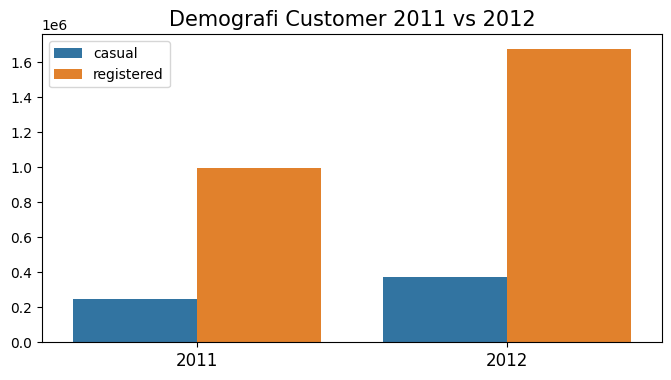

In [70]:
# sns.barplot(data=customer_11v12, x="year", y="jumlah_customer", hue="tipe_pelanggan")
# plt.show()
plt.figure(figsize=(8, 4))

sns.barplot(
    y="jumlah_customer", 
    x="year",
    hue="tipe_pelanggan",
    data=customer_11v12
)

plt.title("Demografi Customer 2011 vs 2012", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.legend()

plt.show()

*Terlihat jelas bahwa jumlah customer yang terdaftar lebih banyak jika dibandingkan dengan yang casual. Dari gambar juga kita dapat menarik kesimpulan bahwa dalam setahun customer yang terdaftar jumlahnya meningkat cukup pesat.*

#### b. berdasarkan hour


*Selanjutnya berdasarkan jam untuk melihat secara umum latar belakangnya*

In [71]:
demografi_customer_by_hour = pd.DataFrame(hour_df.groupby(by=['hr']).agg({
    "casual": 'sum',
    "registered": 'sum',
    "cnt": 'sum'
}))

demografi_customer_by_hour = demografi_customer_by_hour.sort_values(by='cnt', ascending=False)
demografi_customer_by_hour.reset_index(inplace=True)

demografi_customer_by_hour

,hr,casual,registered,cnt
0,17,54220,282640,336860
1,18,44496,265276,309772
2,8,15761,245240,261001
3,16,53834,173914,227748
4,19,35505,191284,226789
5,13,52713,132206,184919
6,12,49718,134696,184414
7,15,54606,128543,183149
8,14,55089,120563,175652
9,20,26378,138172,164550


c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

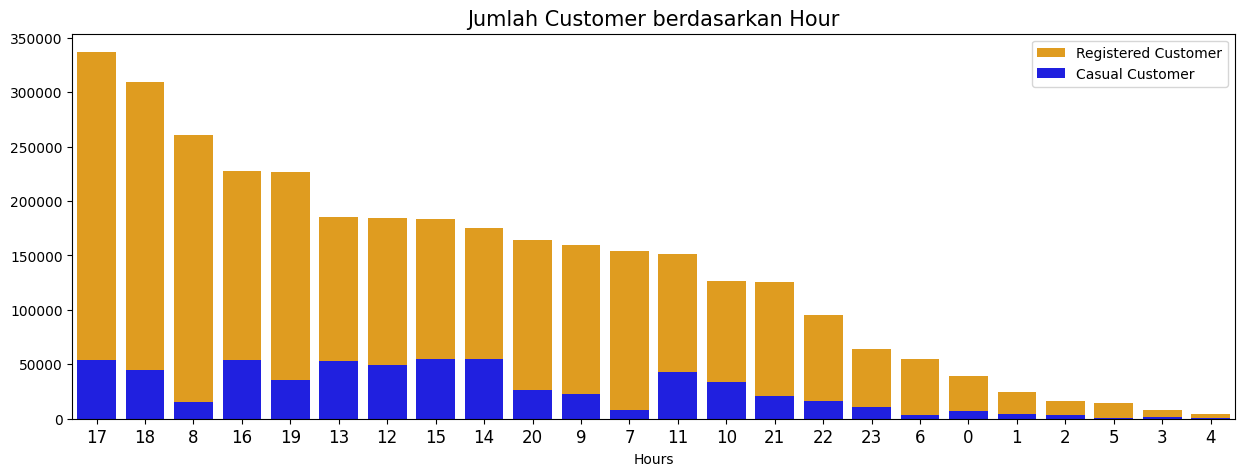

In [72]:
custom_order = demografi_customer_by_hour['hr']

plt.figure(figsize=(15, 5))

sns.barplot(
    y="registered", 
    x="hr",
    data=demografi_customer_by_hour,
    color='orange',
    label='Registered Customer',
    order=custom_order,
    bottom=demografi_customer_by_hour['casual']
)

sns.barplot(
    y="casual", 
    x="hr",
    data=demografi_customer_by_hour,
    color='blue',
    label='Casual Customer',
    order=custom_order,
)

plt.title("Jumlah Customer berdasarkan Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Hours")
plt.tick_params(axis='x', labelsize=12)
plt.legend()

plt.show()

*Dalam gambar yang ada kita dapat melihat bahwa pada pukul 17:00 - 18:00 jumlah pengguna sepeda cukup banyak. Hal ini bisa saja terjadi karena pada waktu tersebut banyak orang yang melakukan perjalanan pulang ke rumah mereka. Dan pada pukul 00:00 - 04:00 pengguna sangat sedikit karena waktu tersebut adalah malam hari.*

#### c. berdasarkan workingday

*Selanjutnya berdasarkan hari kerja*

In [73]:
demografi_customer_by_workingday = hour_df.groupby(by='workingday').agg({
    'cnt': 'sum'
}).reset_index()

demografi_customer_by_workingday_df = pd.DataFrame({
    'Week': ['Holiday/Weekend', 'Workingday'],
    'Jumlah_Customer': demografi_customer_by_workingday['cnt']
})

demografi_customer_by_workingday_df

,Week,Jumlah_Customer
0,Holiday/Weekend,1000269
1,Workingday,2292410


c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with n

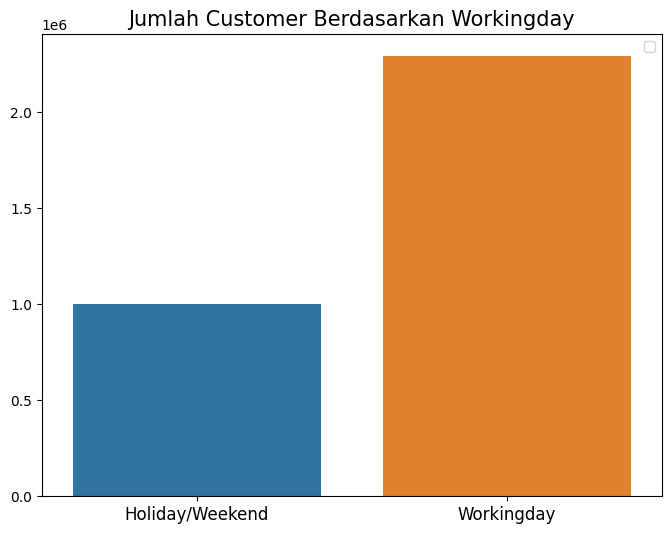

In [74]:
plt.figure(figsize=(8, 6))

sns.barplot(
    y="Jumlah_Customer", 
    x="Week",
    data=demografi_customer_by_workingday_df
)

plt.title("Jumlah Customer Berdasarkan Workingday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.legend()

plt.show()

*Berdasarkan gambar terlihat bahwa traffic pengguna pada hari kerja memang lebih banyak. Hal ini karena banyaknya pengguna yang berangkat ke kantor, sekolah, dll. Hal ini juga berhubungan dengan traffic pengguna yang padat pada pukul 17:00, 18:00, dan 08:00.*

### Pertanyaan 2: Kapan kondisi terbaik pelanggan melakukan peminjaman sepeda?

*Untuk Menjawab Pertanyaan ini kita akan melihat berdasarkan season dan weather situation*

#### a. berdasarkan season

In [75]:
count_customer_bySeason = hour_df.groupby(by=['yr', 'season']).agg({
    'cnt': 'sum'
}).reset_index()

def check_season(season):
    if season == 1:
        return 'Springer'
    elif season == 2:
        return 'Summer'
    elif season == 3:
        return 'Fall'
    elif season == 4:
        return 'Winter'

count_customer_bySeason_df = pd.DataFrame({
    'yr': count_customer_bySeason.yr.apply(lambda x: 2011 if x == 0 else 2012),
    'season': count_customer_bySeason.season.apply(lambda x: check_season(x)),
    'cnt': count_customer_bySeason['cnt']
})

count_customer_bySeason_df

,yr,season,cnt
0,2011,Springer,150000
1,2011,Summer,347316
2,2011,Fall,419650
3,2011,Winter,326137
4,2012,Springer,321348
5,2012,Summer,571273
6,2012,Fall,641479
7,2012,Winter,515476


c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

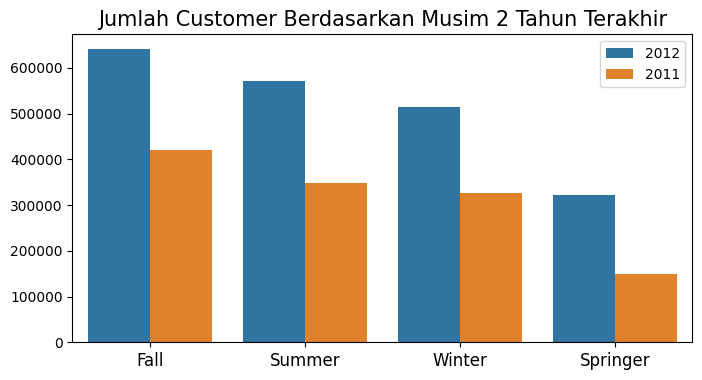

In [76]:
count_customer_bySeason_df['yr'] = count_customer_bySeason_df['yr'].astype(str)

plt.figure(figsize=(8, 4))

sns.barplot(
    y="cnt", 
    x="season",
    hue="yr",
    data=count_customer_bySeason_df.sort_values(by='cnt', ascending=False),
)

plt.title("Jumlah Customer Berdasarkan Musim 2 Tahun Terakhir", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.legend()

plt.show()

*Terlihat bahwa setiap tahunnya musim gugur adalah waktu paling favorit orang-orang untuk menggunakan sepeda*

#### 2. Berdasarkan Weather

In [77]:
count_customer_byWeather = hour_df.groupby(by=['yr', 'weathersit']).agg({
    'cnt': 'sum'
}).reset_index()

count_customer_byWeather_df = pd.DataFrame({
    'yr': count_customer_byWeather.yr.apply(lambda x: 2011 if x == 0 else 2012),
    'weathersit': count_customer_byWeather['weathersit'],
    'cnt': count_customer_byWeather['cnt']
})

count_customer_byWeather_df

,yr,weathersit,cnt
0,2011,1,875053
1,2011,2,300519
2,2011,3,67495
3,2011,4,36
4,2012,1,1463120
5,2012,2,495433
6,2012,3,90836
7,2012,4,187


c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ihlas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

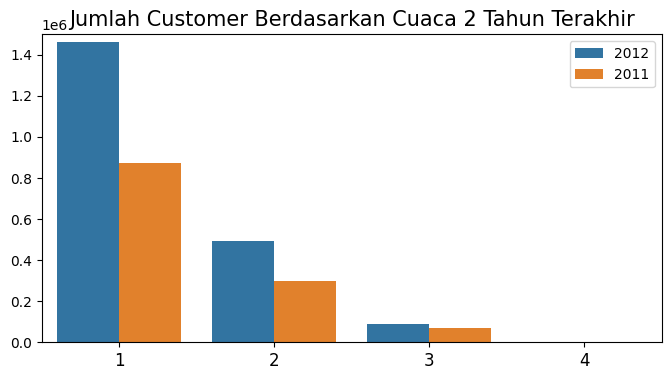

In [78]:
count_customer_byWeather_df['yr'] = count_customer_byWeather_df['yr'].astype(str)

plt.figure(figsize=(8, 4))

ax = sns.barplot(
    y="cnt", 
    x="weathersit",
    hue="yr",
    data=count_customer_byWeather_df.sort_values(by='cnt', ascending=False),
)

plt.title("Jumlah Customer Berdasarkan Cuaca 2 Tahun Terakhir", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.legend()
ax.set_ylim(0, 1500000)

plt.show()

*Keterangan Kondisi Cuaca*
- 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*Terlihat bahwa lebih banyak pengguna saat kondisi cuaca cerah dan sedikit berawan, sedangkan saat kondisi cuaca buruk seperti hujan dan badai ataupun bersalju maka penggunanya sangat sedikit*

## Conclusion

### Conclution pertanyaan 1


Berdasarkan dataset kita menemukan bahwa customer yang dimiliki sudah banyak yang terdaftar. Sedangkan dari sisi latar belakang, secara umum customer adalah seorang pekerja ataupun murid yang dapat dilihat dari ramainya customer terdaftar saat hari kerja pada pukul 17:00, 18:00, dan 08:00.

### Conclusion pertanyaan 2

Waktu terbaik dalam menggunakan sepeda adalah saat cuaca sedang cerah dan berawan, sebaiknya hindari menggunakan sepeda saat cuaca sedang hujan dan badai. Jika dilihat dari musim, musim gugur adalah kondisi dimana menggunakan sepeda cukup nyaman.